## 確率

### 確率への収束
多くの試行を重ねると、(事象の発生数/試行数)が確率に収束していきます。  
以下は、サイコロを何度も振って5が出た回数を数え、(5が出た回数/振った回数)の変遷を表示するコードです。

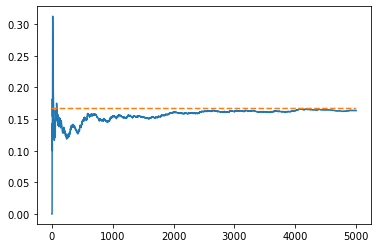

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
total = 0  # 試行数
num_5 = 0  # 5が出た回数
n = 5000  # サイコロを振る回数

for i in range(n):
    if np.random.randint(6)+1 == 5:
        num_5 += 1
    total += 1
    x.append(i)
    y.append(num_5/total)
    
plt.plot(x, y)
plt.plot(x, [1/6]*n, linestyle="dashed")
plt.show()

### 平均値を実装
NumPyのaverage関数で、平均値を求めることができます。  

In [2]:
import numpy as np

x = np.array([55, 45, 60, 40])  # 平均をとるデータ

print(np.average(x))

50.0


### 期待値を実装
期待値は、Numpyのsum関数を用いて実装することができます。

In [3]:
import numpy as np

p = np.array([0.8, 0.15, 0.05])  # 確率
x = np.array([100, 500, 1000])  # 値

print(np.sum(p*x))  # 期待値

205.0


### 分散(値のばらつき具合を表す指標)を実装
NumPyのvar関数で、分散を求めることができます。  

In [4]:
import numpy as np

x = np.array([55, 45, 60, 40])  # 分散をとるデータ

print(np.var(x))

62.5


### 標準偏差を実装
標準偏差も、分散と同様に値のばらつき具合の指標です。  
標準偏差は単位の次元が元の値と同じなので、値の散らばり具合を直感的に表現する際には標準偏差が適している場合が多いです。  
標準偏差は、Numpyのstd関数を用いて求めることができます。

In [5]:
import numpy as np

x = np.array([55, 45, 60, 40])  # 標準偏差をとるデータ

print(np.std(x))

7.905694150420948


### 正規分布の描画
正規分布（normal distribution）はガウス分布（Gaussian distribution）とも呼ばれ、自然界や人間の行動・性質など様々な現象に対してよく当てはまるデータの分布です。  
確率密度関数を使って、正規分布を描画しましょう。  

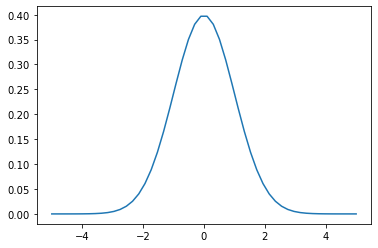

In [6]:
import numpy as np
import matplotlib.pyplot as plt
 
sigma = 1  # 標準偏差
mu = 0  # 平均値

x =np.linspace(-5, 5)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

plt.plot(x, y)
plt.show()

### 乱数による正規分布
Numpyの`random.normal`関数を使って、正規分布に従う乱数を生成します。  
生成したデータは、Matplotlibのhist関数でヒストグラムとして表示します。  

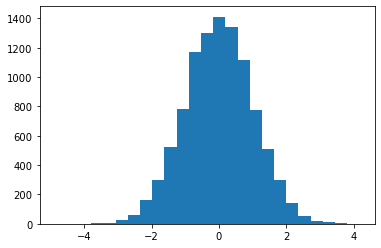

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
# 正規分布に従う乱数を生成 平均0、標準偏差1、10000個
x = np.random.normal(0, 1, 10000)

# ヒストグラム
plt.hist(x, bins=25)  # binsは棒の数
plt.show()

### 共分散の実装
共分散が大きい（正）: Xが大きいとYも大きい、Xが小さいとYも小さい傾向がある  
共分散が 0 に近い: XとYにあまり関係はない  
共分散が小さい（負）: Xが大きいとYは小さい、Xが小さいとYは大きい傾向がある  
    
共分散を、NumPyのaverage関数を使って求めます。  
また、グラフを使って2つのデータの関係を可視化します。  

cov_xy 120.0
cov_xz -160.0


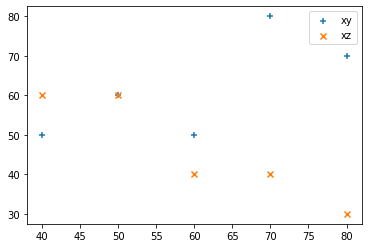

In [8]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([50, 70, 40, 60, 80])  # 数学の点数
y = np.array([60, 80, 50, 50, 70])  # 英語の点数
z = np.array([60, 40, 60, 40, 30])  # 国語の点数

cov_xy = np.average((x-np.average(x))*(y-np.average(y)))
print("cov_xy", cov_xy)

cov_xz = np.average((x-np.average(x))*(z-np.average(z)))
print("cov_xz", cov_xz)

plt.scatter(x, y, marker="+", label="xy")
plt.scatter(x, z, marker="x", label="xz")
plt.legend()
plt.show()

### Pythonで相関係数を求める
相関係数は+1に近づくと正の相関が強く、Xが大きくなるとYが大きくなる傾向が強くなります。  
相関係数が0の場合、XとYには関係がありません。  
相関係数は-1に近づくと負の相関が強く、Xが大きくなるとYが小さくなる傾向が強くなります。  

相関係数は共分散と似ていますが、どのようなケースでも範囲が −1≦𝜌≦1 に収まるため、関係の強さを比較しやすいのがメリットです。  

相関係数は、Numpyのcorrcoef関数を用いて実装することができます。  
共分散と標準偏差を使って計算した値と比較してみましょう。  

[[1.         0.72760688]
 [0.72760688 1.        ]]
0.7276068751089989


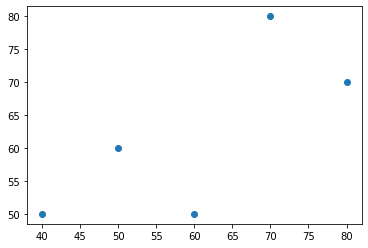

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([50, 70, 40, 60, 80])  # 数学の点数
y = np.array([60, 80, 50, 50, 70])  # 英語の点数

print(np.corrcoef(x, y))  # 相関係数

cov_xy = np.average((x-np.average(x))*(y-np.average(y)))
print(cov_xy/(np.std(x)*np.std(y)))  # （式 1）

plt.scatter(x, y)
plt.show()

### 尤度
尤度（ゆうど）は、人工知能においてデータの尤も（もっとも）らしさを表すのに用います。  
尤度は全てのデータの確率の積です。  

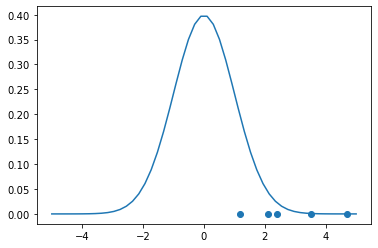

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([2.4, 1.2, 3.5, 2.1, 4.7])
y_data = np.zeros(5)
 
sigma = 1  # 標準偏差
mu = 0     # 平均値

def pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

x_pdf = np.linspace(-5, 5)
y_pdf = pdf(x_pdf)

plt.scatter(x_data, y_data)
plt.plot(x_pdf, y_pdf)
plt.show()

データが正規分布から外れていますね。
このような正規分布を想定する場合、このデータはあまりもっともらしくありません。
尤度は次のように求めることができます。

In [11]:
import numpy as np

x_data = np.array([2.4, 1.2, 3.5, 2.1, 4.7])
 
sigma = 1  # 標準偏差
mu = 0     # 平均値

def pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

p = pdf(x_data)    # 確率
print(np.prod(p))  # 総乗により尤度を計算

1.0632480805734735e-12


尤度はとても小さい値になりましたね。
先ほどの正規分布に対して、データはあまりもっともらしくないといえます。

次に、確率密度関数の標準偏差と平均値を変更します。
標準偏差と平均値をデータのものにします。

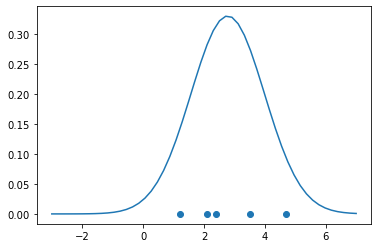

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([2.4, 1.2, 3.5, 2.1, 4.7])
y_data = np.zeros(5)
 
sigma = np.std(x_data)   # 標準偏差をデータのものに
mu = np.average(x_data)  # 平均値をデータのものに

def pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

x_pdf = np.linspace(-3, 7)
y_pdf = pdf(x_pdf)

plt.scatter(x_data, y_data)
plt.plot(x_pdf, y_pdf)
plt.show()

In [13]:
import numpy as np

x_data = np.array([2.4, 1.2, 3.5, 2.1, 4.7])
 
sigma = np.std(x_data)   # 標準偏差をデータのものに
mu = np.average(x_data)  # 平均値をデータのものに

def pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2))  # 確率密度関数

p = pdf(x_data)    # 確率
print(np.prod(p))  # 総乗により尤度を計算

0.0003211757807192693


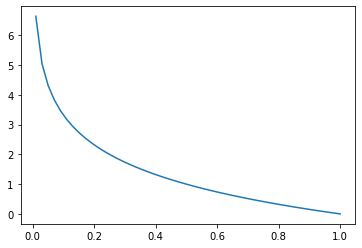

In [14]:
# 選択情報量をグラフ化
# 横軸を確率、縦軸を選択情報量としたグラフを描画します。
# 底が2の対数は、NumPyのlog2関数で計算できます。
import numpy as np
import matplotlib.pyplot as plt

def entropy(x):
    return -np.log2(x)  # 選択情報量

x = np.linspace(0.01, 1)  # 0の対数はとれないので0.01に
y = entropy(x)

plt.plot(x, y)
plt.show()